In [1]:
modelFileName = 'problems/Ginzburg_Landau'

# in ./settings/
conn_name = "connection.json.example"
device_conf_name = "devices.json.example"
%pwd

'/home/imaslenikov/tracer/hybriddomain/dist/tests'

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from IPython.display import Javascript


In [3]:
from hybriddomain.envs.hs.model.model_main import ModelNet as Model
from hybriddomain.settings.settings_main import Settings

### Add model, connection and device to settings: 

In [4]:
model = Model()
model.io.loadFromFile(modelFileName)
settings = Settings(model, conn_name, device_conf_name, conn_name)

INFO:settings_main:device_conf_rpath
INFO:settings_main:devices.json.example


Please enter password for user imaslenikov:


 ·········


### Params to be tested:

In [5]:
# settings.paths['hs']
# block = model.blocks[0]
# block.vertexs['[0]']

print("equations:")
print(model.equations)
print("params:")
print(model.params)
print("paramValues:")
print(model.paramValues)


equations:
[["U'=a*U+b*U*((U)^2+(V)^2)+c*D[U,{x,2}]", "V'=a*V+b*V*((U)^2+(V)^2)+c*D[V,{x,2}]"]]
params:
['a', 'b', 'c']
paramValues:
[{'b': 0.0001, 'c': 0.001, 'a': 0.01}, {'b': -0.0001, 'c': 0.001, 'a': 0.01}, {'b': 1e-05, 'c': 0.001, 'a': 0.01}, {'b': -1e-05, 'c': 0.001, 'a': 0.01}, {'b': 3e-05, 'c': 0.001, 'a': 0.01}, {'b': -3e-05, 'c': 0.001, 'a': 0.01}, {'b': 3e-05, 'c': -0.001, 'a': 0.01}]


### Progress:

In [6]:
from hybriddomain.solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook
from hybriddomain.solvers.hs.postproc.results.results_main import ResultPostprocNet as ResultPostproc


In [7]:
progress_params = ProgressNotebook(len(model.paramValues), prefix='param')
# display(progress_params.progress)

progress_solving = ProgressNotebook(100, prefix='solving')
# display(progress_solving.progress)
# progress_solving.succ(0)

result_postproc = ResultPostproc(modelFileName)

### Clear previous results:

In [8]:
result_postproc.remove_out()

u_seq2.out removed
u_seq4.out removed
u_seq6.out removed
u_seq1.out removed
u_seq5.out removed
u_seq0.out removed
u_seq3.out removed
no_name_plot_seq1.mp4 removed
no_name_plot_seq6.mp4 removed
no_name_plot_seq3.mp4 removed
no_name_plot_seq4.mp4 removed
no_name_plot_seq5.mp4 removed
no_name_plot_seq2.mp4 removed
no_name_plot_seq0.mp4 removed


### Run solver:

In [9]:

from hybriddomain.solvers.hs.remoterun.remoterun import remoteProjectRun


In [10]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))

# parametrisation:
def run(event):
    model = Model()
    model.io.loadFromFile(modelFileName)
    
    for params_idx in range(len(model.paramValues)):
        
        progress_params.succ(params_idx)
        progress_solving.set_prefix("solving")
        
        # changing param:
        model.defaultParamsIndex = params_idx
        model.io.saveToFile(settings.paths["hd"]["json"])
        model = Model()
        model.io.loadFromFile(modelFileName)
        
        remoteProjectRun(settings, 1, progress_solving,remove_old=False)
        
        # result_postproc.extract_out(params_idx, results_params)
        result_postproc.rename_out(params_idx)
    display(Javascript("alert('Done');"))
    
bTest.on_click(run)

display(progress_params.progress)
display(progress_solving.progress)

display(bTest)


IntProgress(value=0, description='param: ', max=6)

IntProgress(value=0, description='solving: ', max=99)

Button(description='run Ginzburg_Landau ', style=ButtonStyle())

In [ ]:
# click button:
# Javascript("$('.widget-button').trigger('click')")


### Results:

In [11]:
# init progress with arbitrary value,
# it will changed inside result_postproc.get_params_results:
progress_array = ProgressNotebook(1, prefix='file')


##### convert out to arrays:

method 1:

In [12]:
display(progress_array.progress)

times, results_param_arrays = result_postproc.get_params_results(progress_array)
Javascript("alert('Done');")

IntProgress(value=0, description='file: ', max=0)

<IPython.core.display.Javascript object>

data access in that case:

In [13]:
seq_number = 4
var = 0
time = times[seq_number][3]
results_param_arrays[seq_number][time][var]

array([-0.01099621, -0.00361351,  0.00376829, ..., -0.02576188,
       -0.01837921, -0.01099621], dtype=float32)

Method 2:

In [14]:
display(progress_array.progress)
model.readResults(progress=progress_array)
Javascript("alert('Done');")

IntProgress(value=6, description='file: ', max=6)

<IPython.core.display.Javascript object>

Data access in that case:

In [15]:
seq_number = 4
var = 0
time = model.results_arrays['u']['timevalues'][3]
model.results_arrays['u']['resvalues'][seq_number][time][var]

array([-0.01099621, -0.00361351,  0.00376829, ..., -0.02576188,
       -0.01837921, -0.01099621], dtype=float32)

### Plot:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

##### U(x, t-fixed):

In [17]:
%matplotlib inline
# using same length for all sequences:
seq_number0 = 0
time0 = times[seq_number0][0]
params_count = len(results_param_arrays.keys())-1
vars_count = len(results_param_arrays[seq_number0][time0])-1
times_count = len(times[seq_number0])-1

def f(param, var, t):
    result = results_param_arrays[param][times[param][t]][var]
    plt.plot(result)
    print("first results:")
    display(result[:3])
w = interactive(f, param=(0, params_count, 1), var=(0, vars_count, 1), t=(0, times_count, 1))
display(w)

interactive(children=(IntSlider(value=3, description='param', max=6), IntSlider(value=0, description='var', ma…

##### U(x-fixed, t):

In [23]:
# using same length for all sequences:
seq_number0 = 0
time0 = times[seq_number0][0]

params_count = len(results_param_arrays.keys())-1
vars_count = len(results_param_arrays[seq_number0][time0])-1
xs_count = len(results_param_arrays[seq_number0][time0][0])-1

def f(param, var, x):
    local_times = times[param][:]
    result = [results_param_arrays[param][t][var][x] for t in local_times]
    plt.plot(result)
w = interactive(f,param=(0, params_count, 1), var=(0, vars_count, 1), x=(0, xs_count,1))
display(w)


interactive(children=(IntSlider(value=3, description='param', max=6), IntSlider(value=0, description='var', ma…

### Run solver for initials:

In [22]:
result_postproc.remove_out()

u_seq4.out removed
u_seq5.out removed
u_seq0.out removed
u_seq3.out removed
u_seq2.out removed
u_seq1.out removed
u_seq6.out removed
no_name_plot_seq2.mp4 removed
no_name_plot_seq3.mp4 removed
no_name_plot_seq1.mp4 removed
no_name_plot_seq6.mp4 removed
no_name_plot_seq5.mp4 removed
no_name_plot_seq0.mp4 removed
no_name_plot_seq4.mp4 removed


In [23]:
initials_data = [1.0, 3.0, 7.0]

In [24]:
progress_params = ProgressNotebook(len(initials_data), prefix='param')

In [13]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))

# parametrisation:
def run(event):
    model = Model()
    model.io.loadFromFile(modelFileName)
    
    for initials_idx, initial_val in enumerate(initials_data):
        
        progress_params.succ(initials_idx)
        progress_solving.set_prefix("solving")
        
        # changing initials:
        new_equation_sent = str(initial_val)+"*sin(x)"
        model.initials[0].values[0] = new_equation_sent
        
        model.io.saveToFile(settings.paths["hd"]["json"])
        model = Model()
        model.io.loadFromFile(modelFileName)
        
        remoteProjectRun(settings, 1, progress_solving, remove_old=False)
        
        # result_postproc.extract_out(initials_idx, results_initials)
        result_postproc.rename_out(initials_idx)
        
    display(Javascript("alert('Done');"))
bTest.on_click(run)

display(progress_params.progress)
display(progress_solving.progress)

display(bTest)

IntProgress(value=0, description='param: ', max=6)

IntProgress(value=0, description='solving: ', max=99)

Button(description='run Ginzburg_Landau ', style=ButtonStyle())

### Results initials:

In [14]:
# init progress with arbitrary value,
# it will changed inside result_postproc.get_params_results:
progress_array = ProgressNotebook(1, prefix='file')

##### convert out to arrays:

method 1:

In [15]:
display(progress_array.progress)
times, results_initial_arrays = result_postproc.get_params_results(progress_array)
Javascript("alert('Done');")

IntProgress(value=0, description='file: ', max=0)

TraitError: setting max < min

Data access in that case:

In [ ]:
seq_number = 4
var = 0
time = times[seq_number][3]
results_param_arrays[seq_number][time][var]

method 2:

In [30]:
# reload files:
model.result_postproc.get_results_filespaths(model)

display(progress_array.progress)
model.readResults(progress=progress_array)
Javascript("alert('Done');")

<IPython.core.display.Javascript object>

Data access in that case:

In [34]:
seq_number = 0
var = 0
time = model.results_arrays['u']['timevalues'][0]
model.results_arrays['u']['resvalues'][seq_number][time][var]

array([ 0.        ,  0.001     ,  0.002     , ..., -0.00518528,
       -0.00418529,  0.        ], dtype=float32)

### Plot initials:

In [ ]:
model.reu

first results:


array([ 0.   ,  0.003,  0.006], dtype=float32)

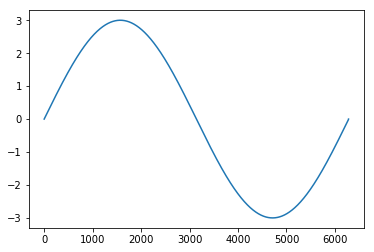

In [36]:
%matplotlib inline

# using same length for all sequences:
seq_number0 = 0
time0 = times[seq_number0][0]

initials_count = len(results_initial_arrays.keys())-1
vars_count = len(results_initial_arrays[seq_number0][time0])-1
times_count = len(times[seq_number0])-1

def f(param, var, t):
    result = results_initial_arrays[param][times[param][t]][var]
    plt.plot(result)
    print("first results:")
    display(result[:3])
w = interactive(f, param=(0, initials_count, 1), var=(0, vars_count, 1), t=(0, times_count, 1))
display(w)

##### U(x-fixed, t):

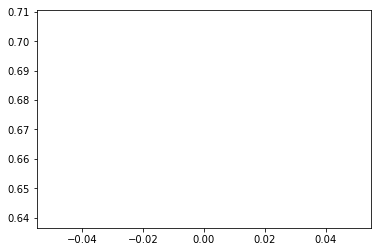

In [37]:
%matplotlib inline

# using same length for all sequences:
seq_number0 = 0
time0 = times[seq_number0][0]

initials_count = len(results_initial_arrays.keys())-1
vars_count = len(results_initial_arrays[seq_number0][time0])-1
xs_count = len(results_initial_arrays[seq_number0][time0][0])-1

def f(param, var, x):
    local_times = times[param][:]
    result = [results_initial_arrays[param][t][var][x] for t in local_times]
    plt.plot(result)
w = interactive(f,param=(0, initials_count, 1), var=(0, vars_count, 1), x=(0,xs_count,1))
display(w)


In [42]:
result_x

array([[  0.00000000e+00,   2.06940070e-01,   2.81882260e-01, ...,
          9.95086190e-01,   9.93937430e-01,   9.92861500e-01],
       [  1.00000000e-02,   2.07092350e-01,   2.81968170e-01, ...,
          9.95086210e-01,   9.93937450e-01,   9.92861520e-01],
       [  2.00000000e-02,   2.07548850e-01,   2.82225810e-01, ...,
          9.95086290e-01,   9.93937530e-01,   9.92861590e-01],
       [  9.98000000e+00,   1.64705428e+01,   1.49028631e+01, ...,
          1.00563151e+00,   1.00412596e+00,   1.00259925e+00],
       [  9.99000000e+00,   1.64713898e+01,   1.49034085e+01, ...,
          1.00563158e+00,   1.00412604e+00,   1.00259932e+00],
       [  1.00000000e+01,   1.64716723e+01,   1.49035904e+01, ...,
          1.00563161e+00,   1.00412606e+00,   1.00259934e+00]])